In [156]:
import pandas as pd

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. МЦТ

| МЦТ | Формула | Устойчивость к выбросам | Тип данных | Pandas | 
| ------ | ------ | ------ | ------ | ------ |
| Среднее | $\frac{1}{n}\sum_{i=1}^{n}{x_i}$ | Неустойчива | Количественные и бинарные (доля $1$ в данных) | `.mean()` |
| Медиана | Значение, меньше которого 50% данных | Устойчива | Количественные | `.median()` |
| Мода | Самое часто встречающееся значение | Устойчива | Количественные, категориальные, бинарные | `.mode()` | 

>**Найти средний возраст пассажиров**

In [158]:
df['Age'].mean()

np.float64(29.69911764705882)

>**Какая доля женщин была на титанике?**

In [159]:
df['Sex_coded'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df['Sex_coded'].mean().round(2)

np.float64(0.35)

>**Найти медиану возраста мужчин**

In [160]:
# 1. фильтрация - оставляем только мужчин
df_male = df[df['Sex']=='male']

# 2. медиана возраста у мужчин
df_male['Age'].median()

np.float64(29.0)

>**Найдите МЦТ для признака `Pclass`**

In [161]:
# .mode()
df['Pclass'].mode().item()

3

In [162]:
# второй способ - посмотреть на первую строчку в .value_counts()
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## 2. Меры разброса

| Мера разброса | Формула | Устойчивость к выбросам | Тип данных | Pandas | 
| ------------- | ------- | ----------------------- | ---------- | ---------- | 
| Размах | $\max{x} - \min{x}$ | Не устойчив | Количественные | `.max() - .min()` |
| Интерквартильный размах | $Q3 - Q1$ | Устойчив | Количественные | `.quantile(0.75) - .quantile(0.25)` |
| Дисперсия | $\frac{1}{n}\sum_{i=1}^{n}{(x_i - \bar{x})^2}$ | Не устойчив | Количественные | `.var()` | 
| Стандартное отклонение | $\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$ | Не устойчив | Количественные | `.std()` | 
| Количество уникальных значений | - | - | Категориальные | `.nunique()` | 
| Частота | - | - | Категориальные | `.value_counts()` | 

>**Дисперсия и стандартное отклонение возраста мужчин? Сильный ли разброс?**

In [163]:
df_male['Age'].std()   # стандартное отклонение

np.float64(14.678200823816603)

In [164]:
df_male['Age'].var()    # дисперсия

np.float64(215.44957942429042)

In [165]:
df_male['Age'].std() ** 2   # дисперсия способ 2

np.float64(215.4495794242904)

>**Размах и интерквартильный размах `Fare`? Есть ли выбросы?**

In [166]:
# размах 
range_ = df['Fare'].max() - df['Fare'].min()
range_

np.float64(512.3292)

In [170]:
# 10-й квантиль = значение, меньше которого 10% данных (=0.1 доля данных). 
df['Fare'].quantile(0.1) 

np.float64(7.55)

In [173]:
# 25-й квантиль = значение, меньше которого 25% данных (=первый квартиль, Q1). 
df['Fare'].quantile(0.25) 

np.float64(7.9104)

In [174]:
# интерквартильный размах = Q3 - Q1
df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)

np.float64(23.0896)

>**Какие интерпретируемые меры разброса можно найти для признака `Sex`? А для `Survived`? Рассчитайте их.**

Для категориальных признаков интерпретируемая мера разброса - только число уникальных значений (`.nunique()`). Даже если бинарный признак закодирован 0 и 1 (как `Survived`) считать дисперсию, IQR и другие меры разброса для количественных признаков нельзя! Это неинтерпретируемо.

In [175]:
# количество уникальных значений -- .nunique()
df['Sex'].nunique()

2

In [176]:
df['Survived'].nunique()

2

## 3. Пропущенные значения

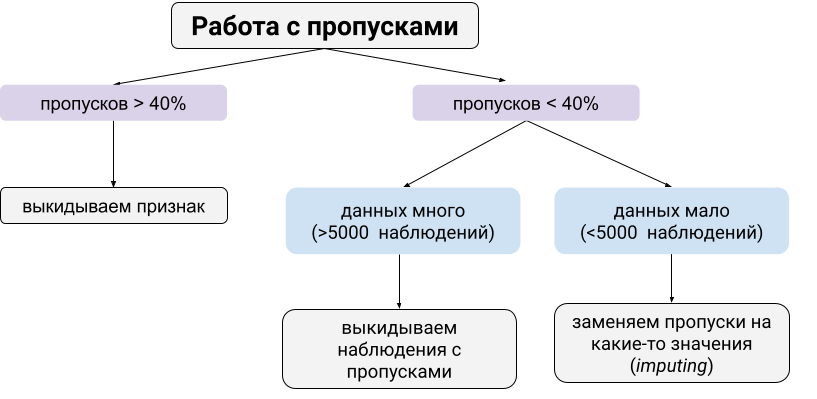

### 3.1 Просмотр пропусков

Количество пропусков в каждой из колонок датафрейма- метод [.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html)

```python
    table_name.isna().sum()
```

In [177]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_coded        0
dtype: int64

Доля пропусков в каждой из колонок датафрейма:

```python
    table_name.isna().mean()
```

In [178]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Sex_coded      0.000000
dtype: float64

Можно посмотреть на строчки, которые содержат пропуск в определенной колонке:
```python
    table_name[table_name['column_name'].isna()]
```

In [179]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


Можно также посмотреть на строчки, которые, наоборот, **не** содержат пропуск в данной колонке (`~` - отрицание условия):
```python
    table_name[~table_name['column_name'].isna()]
```

In [180]:
df[~df['Age'].isna()]   # оператор отрицания

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Другой метод для просмотра строчек, **не** содержащих пропуск в `column_name` - `.notna()`:

```python
    table_name[table_name['column_name'].notna()]
```

In [181]:
df[df['Age'].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


### 3.2 Модификация пропущенных значений

1. **Пропусков много (>40%): удаление колонки**

    ``` python
        # вернет датафрейм без колонки - можно сохранить в новую переменную
        table_name.drop('column_name', axis=1)
        
        # удалит колонку из изначального датафрейма
        table_name.drop('column_name', axis=1, inplace=True)
    ```

**P.S.:** если Вы попытаетесь удалить несуществующий столбец из датафрейма - возникнет ошибка. Например, такое может возникнуть при повторном запуске удаления колонки с `inplace=True`

In [182]:
df_filtered = df.drop('Cabin', axis=1)
df_filtered.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1


Можно удалять несколько колонок:

```python
    table_name.drop(['column_name_1', 'column_name_2', ...], axis=1)
```

Аналогично можно ставить `inplace=True` - изменит исходный датафрейм, удалив там колонки

In [183]:
df_filtered2 = df.drop(['Pclass', 'Sex_coded'], axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


2. **Пропусков мало (<40%): сохранение колонки**

Если наблюдений много (>5к) - дропаем такие наблюдения (можем ими пренебречь)
```python
    table_name.dropna(subset=['column_name_1', 'column_name_2', ...])
```

In [184]:
df.dropna(subset=['Age'])   # то же самое, что и df[df['Age'].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [185]:
# можно дропнуть несколько колонок
df.dropna(subset=['Age', 'Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


Если наблюдений мало (<5к) или пропусков очень мало - заменяем пропущенные значения на какое-то число. Можно заменять на:

- *МЦТ* - медиану (или среднее) для количественных данных, моду для категориальных данных
- *Случайное число* для количественных данных (в пределах нижней-верхней границ), *случайную категорию* для категориальных данных (из имеющихся)
- Эвристики...

```python
    table_name['column_name'].fillna(your_value)
```

In [187]:
median_age = df['Age'].median()
print(median_age)

df['Age_filled_median'] = df['Age'].fillna(median_age)
df

28.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_coded,Age_filled_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,26.0


In [189]:
age_mean = df['Age'].mean()

df['Age_filled_mean'] = df['Age'].fillna(age_mean)

In [192]:
# в колонках ^_filled -- пропусков нет, мы справились!

df['Cabin_filled_mode'] = df['Cabin'].fillna('G6')
df.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Sex_coded              0
Age_filled_median      0
Age_filled_mean        0
Cabin_filled_mode      0
dtype: int64

## 4. Выбросы (outliers)

### 4.1 Поиск выбросов: $1.5 \cdot IQR$

**Выбросами** считаются значения, которые находятся **за пределами диапазона**:
$$[\text{Q1} − 1.5 \times \text{IQR}, \text{Q3} + 1.5 \times \text{IQR}]$$

In [193]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

left_border = Q1 - 1.5 * IQR
right_border = Q3 + 1.5 * IQR

print(left_border, right_border)


# вывести только выбросы = найти наблюдения, которые меньше, чем Q1 - 1.5 * IQR ИЛИ больше, чем Q3 + 1.5 * IQR
# делаем фильтрацию
df[(df['Fare'] < left_border) | (df['Fare'] > right_border)].shape

-26.724 65.6344


(116, 16)

In [194]:
# наблюдения, которые НЕ считаются выбросами
# наблюдения, которые больше Q1 - 1.5 * IQR И меньше, чем Q3 + 1.5 * IQR (= находятся внутри диапазона, интервала)

df[(df['Fare'] > left_border) & (df['Fare'] < right_border)].shape

(775, 16)

### 4.2 Поиск выбросов: $3 \cdot \text{std}$

Выбросы также можно выявить с помощью стандартного отклонения, которое показывает, насколько данные отклоняются от среднего значения. Согласно этому правилу, **выбросами** считаются данные, которые лежат **за пределами 3 стандартных отклонений от среднего арифметического.**
$$[\bar{x} - 3 \cdot \text{std}, \bar{x} + 3 \cdot \text{std}],$$
где $\bar{x}$ - среднее арифметическое, $\text{std}$ - стандартное отклонение

<p align="center">
  <img src="../../img/Normal_Distribution_out.png" alt="My Image"/>
</p>

In [195]:
mean_fare = df['Fare'].mean()
std_fare = df['Fare'].std()

left_border = mean_fare - 3 * std_fare
right_border = mean_fare + 3 * std_fare

left_border, right_border

(np.float64(-116.87607782296804), np.float64(181.2844937601173))

In [196]:
# только выбросы
df[(df['Fare'] < left_border) | (df['Fare'] > right_border)].shape

(20, 16)

In [197]:
# вывести не выбросы
df[(df['Fare'] > left_border) & (df['Fare'] < right_border)].shape

(871, 16)

# НЭ

In [198]:
import pandas as pd

## B3

**(Датасет 1). Укажите значение, меньше которого 25% наблюдений признака humidity? Ответ округлите до двух знаков.**

In [199]:
df_b1 = pd.read_csv('../../data/train1_b.csv')
df_b1.head()

,season,atemp,humidity,windspeed
0,1,14.395,81,0.0
1,1,13.635,80,0.0
2,1,13.635,80,0.0
3,1,14.395,75,0.0
4,1,14.395,75,0.0


Значение, меньше которого 25% данных = первый квартиль:

In [200]:
df_b1['humidity'].quantile(0.25)

np.float64(49.0)

**(Датасет 2). Укажите длину интервала, в котором лежит 50% центральных данных признака calcium. Ответ округлите до двух знаков.**

In [201]:
df_b2 = pd.read_csv('../../data/train2_b.csv')
df_b2.head()

,cat,total_fat,protein,calcium
0,3,20,17,25
1,3,12,18,25
2,3,35,14,25
3,3,43,21,30
4,3,35,21,25


Длина интервала, в котором лежит 50% данных - интерквартильный размах, равный разности третьего и первого квартилей

In [202]:
df_b2['calcium'].quantile(0.75) - df_b2['calcium'].quantile(0.25)

np.float64(24.0)

**(Датасет 3). Для признака Region рассчитайте интерпретируемую меру вариативности. Ответ округлите до двух знаков.**

In [204]:
df_b3 = pd.read_csv('../../data/train3_b.csv')
df_b3.head()

,Country,Region,Economy,Health
0,Switzerland,J,1.40,0.94
1,Iceland,J,1.30,0.95
2,Denmark,J,1.33,0.87
3,Norway,J,1.46,0.89
4,Canada,F,1.33,0.91


Region - категориальный признак. Интерпретируемая мера разброса - только количество уникальных значений

In [127]:
df_b3['Region'].nunique()

10

## C2

В заданиях C2 - сначала фильтрация (1-2 условия). После - подсчет статистики

**(Датасет 1). Укажите средний пробег (Mileage) автомобилей, выпущенных в XXI веке (начался в 2001 году). Ответ округлите до двух знаков.**

In [134]:
df_c1 = pd.read_csv('../../data/train1_C.csv')
df_c1.head()

,Car Name,Year,Region,FuelType,Mileage,Price,Owners
0,Ford Transit,2002,Goris,Diesel,215000,12000,4
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500,5
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000,5
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000,3
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500,6


In [207]:
# 1. фильтрация - оставляем автомобили 21 века
df_c1_filtrated = df_c1[df_c1['Year'] > 2000]

# 2. статистика (среднее)
df_c1_filtrated['Mileage'].mean().round(2)

np.float64(126058.44)

**(Датасет 2). Укажите дисперсию оценок эксперта (grade) для домов, находящиеся на набережной (1;waterfront) и чья общая площадь (sqft_lot) больше чем средняя площадь домов, представленных в выборке. Ответ округлите до двух знаков.**

In [208]:
df_c2 = pd.read_csv('../../data/train2_C.csv')
df_c2.head()

,price,bedrooms,sqft_living,sqft_lot,waterfront,grade,yr_built,yr_renovated
0,221900.0,3,1180,5650,0,7,1955,0
1,538000.0,3,2570,7242,0,7,1951,1991
2,180000.0,2,770,10000,0,6,1933,0
3,604000.0,4,1960,5000,0,7,1965,0
4,510000.0,3,1680,8080,0,8,1987,0


In [209]:
# 1. фильтрация
df_c2_filtrated = df_c2[(df_c2['waterfront'] == 1) & (df_c2['sqft_lot'] > df_c2['sqft_lot'].mean())]

# 2. Статистика (дисперсия)
df_c2_filtrated['grade'].var().round(2)

np.float64(3.14)

## C5

Задание C5 - поиск выбросов (или не-выбросов) или на основе среднего/стандартного отклонения, или интерквартильного размаха.

**(Датасет 1). Будем считать, что выбросами считаются наблюдения, которые отличаются от среднего арифметического более, чем на 1.5 стандартных отклонения. Определите, сколько наблюдений считаются выбросами по признаку Price. Ответ округлите до двух знаков.**

In [210]:
left_border = df_c1['Price'].mean() - df_c1['Price'].std() * 1.5
right_border = df_c1['Price'].mean() + df_c1['Price'].std() * 1.5

# наблюдения, которые ИЛИ левее левой границы, ИЛИ правее правой границы
df_c1[(df_c1['Price'] < left_border) | (df_c1['Price'] > right_border)].shape[0]

357

**(Датасет 2). Будем считать, что выбросами считаются наблюдения, которые отличаются от среднего арифметического на 1 стандартное отклонение и более. Определите, сколько наблюдений считаются выбросами по признаку price. Ответ округлите до двух знаков.**

In [211]:
left_border = df_c2['price'].mean() - df_c2['price'].std()
right_border = df_c2['price'].mean() + df_c2['price'].std()

df_c2[(df_c2['price'] < left_border) | (df_c2['price'] > right_border)].shape[0]

2399